<a href="https://colab.research.google.com/github/josecamachobravo/CienciaDatos/blob/main/ModelRegre_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

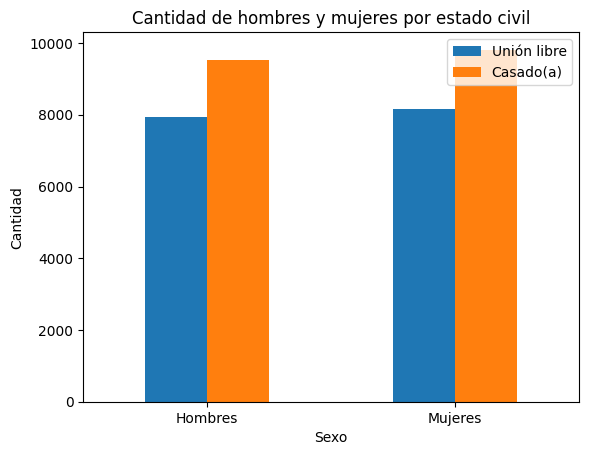

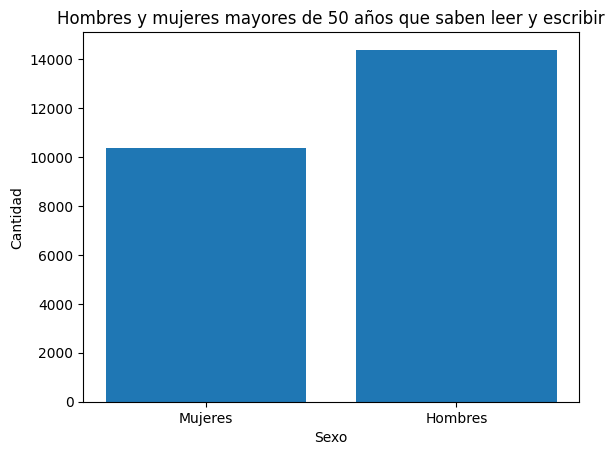

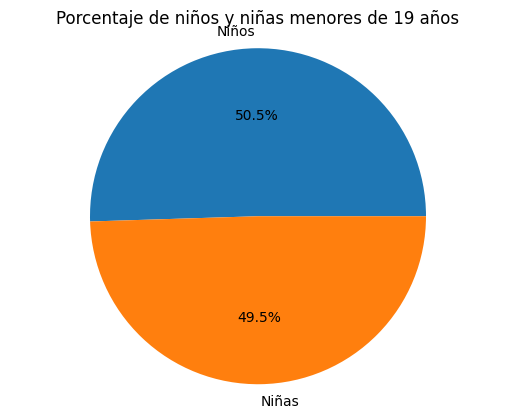

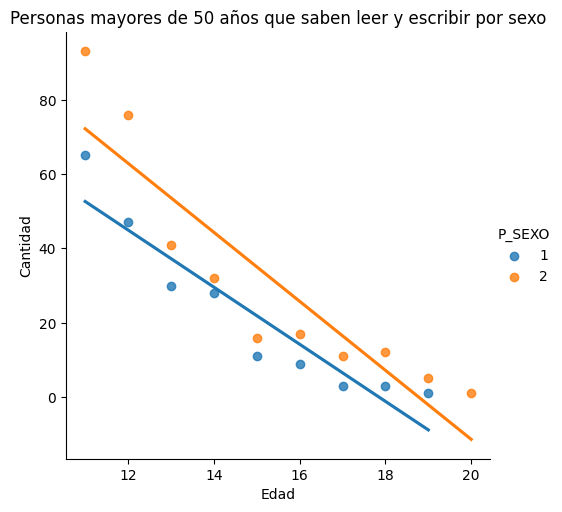

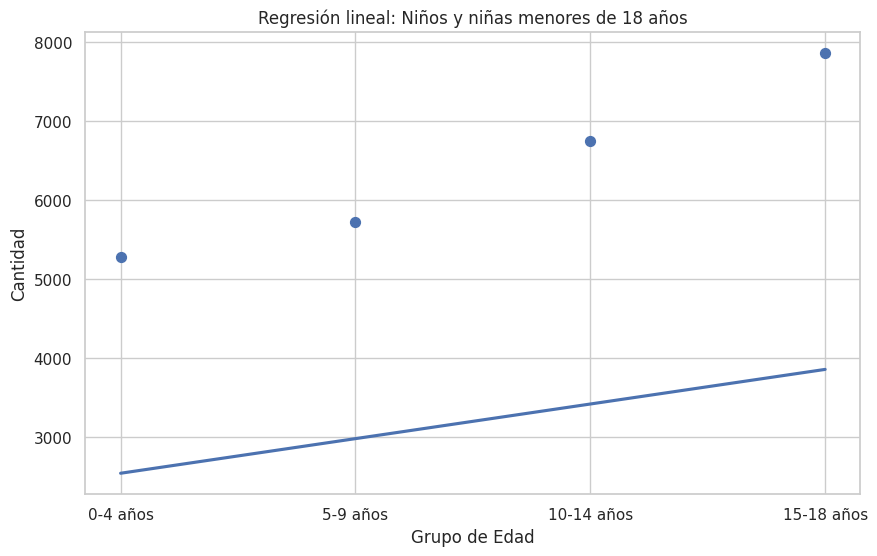

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ruta = r'https://github.com/josecamachobravo/CienciaDatos/raw/main/CienciaDatos/CNPV2018_5PER_A2_05.csv'
df = pd.read_csv(ruta)

# Grafico de hombres y mujeres con diferentes estados civiles
filtro = (df['P_SEXO'].isin([1, 2])) & (df['P_EST_CIVIL'].isin([1, 2]))
datos_filtrados = df[filtro]

conteo_sexo_estado_civil = datos_filtrados.groupby(['P_SEXO', 'P_EST_CIVIL']).size().unstack()

conteo_sexo_estado_civil.plot(kind='bar')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.title('Cantidad de hombres y mujeres por estado civil')
plt.xticks([0, 1], ['Hombres', 'Mujeres'], rotation=0)
plt.legend(['Unión libre', 'Casado(a)'])
plt.show()


# Grafico hombres y mujeres mayores de 50 años que saben leer y escribir
filtro = (df['P_SEXO'].isin([1, 2])) & (df['P_EDADR'].isin([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21])) & (df['P_ALFABETA'] == 1)
datos_filtrados = df[filtro]

conteo_sexo = datos_filtrados['P_SEXO'].value_counts()

plt.bar(conteo_sexo.index, conteo_sexo.values)
plt.xticks(conteo_sexo.index, ['Hombres', 'Mujeres'])
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.title('Hombres y mujeres mayores de 50 años que saben leer y escribir')
plt.show()

# Grafico para obtener niños y niñas menores de 18 años
filtro = (df['P_SEXO'].isin([1, 2])) & (df['P_EDADR'].isin([1, 2, 3, 4]))
datos_filtrados = df[filtro]

conteo_sexo = datos_filtrados['P_SEXO'].value_counts()

plt.pie(conteo_sexo.values, labels=['Niños', 'Niñas'], autopct='%1.1f%%')
plt.title('Porcentaje de niños y niñas menores de 18 años')
plt.axis('equal')
plt.show()


# Grafico regresion lineal
filtros = ((df['P_SEXO'] == 1) | (df['P_SEXO'] == 2)) & (df['P_EDADR'].isin([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]))

df_filtrado = df[filtros]

df_sabe_leer_escribir = df_filtrado[(df_filtrado['P_ALFABETA'] == 1) & (df_filtrado['PA_ASISTENCIA'] == 1)]

conteo = df_sabe_leer_escribir.groupby(['P_SEXO', 'P_EDADR']).size().reset_index(name='count')

sns.lmplot(x='P_EDADR', y='count', hue='P_SEXO', data=conteo, ci=None)

plt.title('Personas mayores de 50 años que saben leer y escribir por sexo')
plt.xlabel('Edad')
plt.ylabel('Cantidad')

plt.show()



# Grafica regresion lineal
filtro_sexo = df['P_SEXO'].isin([1, 2])
filtro_edad = df['P_EDADR'].isin([1, 2, 3, 4])
df_filtrado = df[filtro_sexo & filtro_edad]

conteo = df_filtrado.groupby(['P_SEXO', 'P_EDADR']).size().reset_index(name='count')

grupos_edad = [1, 2, 3, 4]
etiquetas_edad = ['0-4 años', '5-9 años', '10-14 años', '15-18 años']

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.regplot(x='P_EDADR', y='count', data=conteo, x_estimator=sum, ci=None)
plt.title("Regresión lineal: Niños y niñas menores de 18 años")
plt.xlabel("Grupo de Edad")
plt.ylabel("Cantidad")
plt.xticks(grupos_edad, etiquetas_edad)
plt.show()
